<a href="https://colab.research.google.com/github/TAUforPython/machinelearning/blob/main/NN%20hyperparameters%20optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions

# Загрузка, очистка и визуализация данных

Пример №1 - финансы: оценка кредитоспособности

Столбец **default** - показывает статус по дефолту заёмщика

Независимые переменные:

— возраст заемщика (age);

— образование заемщика (ed);

— стаж заемщика на последнем месте работы (employ);

— срок проживания заемщика по последнему адресу (address);

— ежемесячный личный доход заемщика (income);

— процент долговых обязательств заемщика от дохода (debtinc);

— долг заемщика по кредитной карте банка (creddebt);

— прочие долговые обязательства заемщика (othdebt).

In [ ]:
#table_data = pd.read_csv('https://raw.githubusercontent.com/TAUforPython/BioMedAI/main/test_datasets/bankloans.csv')
#table_data = table_data.dropna(subset=['default'])
#print(table_data)

#table_data['default'] = table_data['default'].astype('int')
#print(table_data)

Пример №2 - медицина - дата сет кардиология:
выгружено и предобработано MIMIC-IV-ECG/ Diagnostic Electrocardiogram Matched Subset v1.0

Столбец **Healthy_Status**: 0 = пациент, 1 - условно здоровый.

https://physionet.org/content/mimic-iv-ecg/1.0/

Декодированы метки времени, добавлен признак Healthy_Status

Полезная ссылка на понимание ЭКГ: https://ecgwaves.com/topic/ecg-normal-p-wave-qrs-complex-st-segment-t-wave-j-point/

In [ ]:
#пример загрузки с Google Drive напрямую с расшеренной ссылки
!wget https://drive.google.com/file/d/1-Z2Yvcl7J8ZhdSp-MEqTHfzdrhbSdcdB

In [ ]:
#пример загрузки с Google Drive со своими учетными данными
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

import functools
pd.read_csv = functools.partial(pd.read_csv, low_memory=False)


ecg_path = '/content/drive/MyDrive/edf_process/ECG_array_arrow_data.csv'
#table_data = pd.read_csv(ecg_path, nrows=10000, parse_dates=True)
table_data = pd.read_csv(ecg_path, nrows=100,low_memory=False)

In [2]:
#пример загрузки файла непосредственно с GIT хранилища
link_path = 'https://raw.githubusercontent.com/TAUforPython/BioMedAI/main/test_datasets/test_data_ECG.csv'
df = pd.read_csv(link_path, parse_dates=True)
total_rows = len(df.index)
headers = df.columns

In [3]:
#проверяем размер выборки
df.shape

(10000, 36)

9000
Random values to read: [3, 19, 27, 34, 36, 46, 54, 90, 119, 121, 123, 141, 144, 185, 187, 188, 190, 197, 217, 245, 258, 278, 280, 289, 307, 310, 313, 346, 352, 368, 417, 428, 429, 456, 466, 470, 473, 486, 491, 496, 498, 508, 542, 551, 557, 567, 569, 572, 578, 582, 595, 601, 627, 628, 638, 648, 662, 674, 676, 677, 679, 692, 714, 751, 763, 770, 782, 795, 809, 821, 830, 841, 843, 859, 879, 896, 899, 901, 902, 916, 922, 947, 955, 956, 960, 969, 971, 975, 984, 987, 988, 993, 994, 1014, 1017, 1042, 1065, 1078, 1083, 1099, 1106, 1129, 1135, 1153, 1158, 1197, 1228, 1240, 1262, 1266, 1283, 1301, 1308, 1314, 1324, 1329, 1334, 1343, 1347, 1380, 1391, 1395, 1421, 1435, 1439, 1444, 1467, 1468, 1474, 1475, 1478, 1493, 1500, 1511, 1517, 1535, 1537, 1560, 1563, 1566, 1567, 1570, 1573, 1580, 1603, 1609, 1634, 1657, 1678, 1679, 1681, 1690, 1695, 1703, 1716, 1721, 1728, 1735, 1773, 1780, 1786, 1812, 1813, 1819, 1826, 1833, 1836, 1837, 1838, 1847, 1855, 1860, 1861, 1870, 1871, 1872, 1908, 1919, 1953,

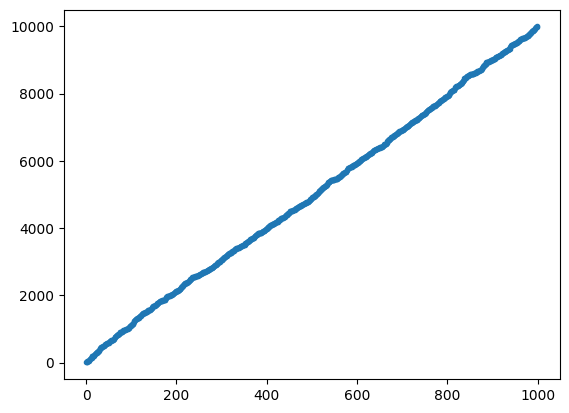

In [4]:
#формирование слуайного набора индексов для выгрузки из большого файла
import random
total_number=range(total_rows)
rows2read = 1000 # number rows to read
random_value2skip = sorted(random.sample(range(total_rows),total_rows-rows2read))

print(len(random_value2skip))

print("Random values to read:", sorted(set(total_number).difference(random_value2skip)))
random_value2read = sorted(np.array(list(set(total_number).difference(random_value2skip))))
plt.plot(random_value2read,'.')

In [5]:
# загрузка из большого массива случайного набора сэмплов с сохранением header
import random

dtypes = {'eeg_date': 'object'}
link_path = 'https://raw.githubusercontent.com/TAUforPython/BioMedAI/main/test_datasets/test_data_ECG.csv'

table_data = pd.read_csv(link_path, skiprows=random_value2skip)
table_data.columns = headers
#table_data = pd.read_csv(link_path, nrows=1000)
print(table_data)

     subject_id  Count_subj  study_id  cart_id  Healthy_Status eeg_time   \
0      11662086           3  40000259  6376932               0   8:31 AM   
1      14924804           4  40000384  6848296               0   2:34 PM   
2      13242231           3  40000533  6555070               0   3:50 PM   
3      11658801           2  40000565  6097533               0   3:18 PM   
4      16417748          37  40000761  6896680               0   4:15 PM   
..          ...         ...       ...      ...             ...       ...   
995    19826528           1  40124879  6870563               0   9:51 PM   
996    16498005          11  40125065  6672155               0  12:29 PM   
997    19640736          13  40125205  6919786               0   1:48 PM   
998    14816795           1  40125256  6555070               1   6:01 PM   
999    14747544          12  40125285  6848296               0  11:58 PM   

      eeg_date                                            report_0  \
0    26.08.2011  

In [6]:
#преобразуем данные в временной формат
pd.to_datetime(table_data['eeg_date '], dayfirst=True)

,eeg_date
0,2011-08-26
1,2016-02-06
2,2012-01-07
3,2015-12-16
4,2016-03-15
...,...
995,2011-09-17
996,2012-12-14
997,2011-01-15
998,2016-04-12


In [7]:
uniq_patient_table_data = table_data['subject_id'].unique()
print('число уникальных записей по параметру subjet_id = ', len(uniq_patient_table_data))

число уникальных записей по параметру subjet_id =  991


In [8]:
#table_data.groupby(['item_#','status']).first().unstack().dropna().stack()
table_data.groupby(['subject_id']).first().unstack().dropna()

subject_id
Count_subj  10025458         4
            10043050        10
            10043646        15
            10051944         3
            10081639         6
                          ... 
t_axis      19951395        15
            19966568        18
            19972266        16
            19981210      -128
            19985885        45
Length: 20273, dtype: object

In [9]:
# make new dataset from old columns
pre_data = table_data[['subject_id', 'study_id', 'eeg_date ', 'rr_interval', 'p_onset', 'p_end', 'qrs_onset', 'qrs_end', 't_end', 'p_axis', 'qrs_axis', 't_axis', 'Healthy_Status']].copy()

table_data = table_data[['Healthy_Status', 'rr_interval','p_end','qrs_onset','qrs_end','p_axis','qrs_axis','t_axis']].copy()

In [10]:
table_data.head()

,Healthy_Status,rr_interval,p_end,qrs_onset,qrs_end,p_axis,qrs_axis,t_axis
0,0,666,168,246,328,69,26,95
1,0,722,154,234,318,53,-7,18
2,0,769,29999,200,302,29999,-18,-67
3,0,1200,182,200,286,52,-7,-58
4,0,895,180,220,302,42,-27,-62


# AutoML BlueCast

https://www.kaggle.com/code/thomasmeiner/ps3e24-bluecast-eda-automl-tracking

In [11]:
!pip install bluecast --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.9/175.9 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.4/97.4 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 3.7 MB/s eta 0:00:00


In [12]:
import numpy as np
import pandas as pd
import re


from bluecast.blueprints.cast import BlueCast
from bluecast.blueprints.cast_cv import BlueCastCV
from bluecast.config.training_config import TrainingConfig, XgboostTuneParamsConfig
from bluecast.preprocessing.custom import CustomPreprocessing
from bluecast.general_utils.general_utils import save_to_production, load_for_production

from sklearn.model_selection import StratifiedKFold, RepeatedKFold

In [13]:
data = table_data

#Оставляем только нужные столбцы (ID Пациента, Порядковый номер исследования - для удобства сортировки последовательности измерений рез-ов болезней, Статус,
#Дату - чтобы понимать случаи измерений с большим временным интервалом, Все показатели измерений)

columns_to_check = ['rr_interval', 'p_onset', 'p_end', 'qrs_onset', 'qrs_end', 't_end', 'p_axis', 'qrs_axis', 't_axis']
clear_data = pre_data[(pre_data[columns_to_check] < 2000).all(axis=1)]
clear_data = clear_data[(clear_data['p_onset'] < clear_data['p_end']) & (clear_data['qrs_onset'] < clear_data['qrs_end'])]

clear_data

,subject_id,study_id,eeg_date,rr_interval,p_onset,p_end,qrs_onset,qrs_end,t_end,p_axis,qrs_axis,t_axis,Healthy_Status
0,11662086,40000259,26.08.2011,666,40,168,246,328,592,69,26,95,0
1,14924804,40000384,06.02.2016,722,40,154,234,318,608,53,-7,18,0
3,11658801,40000565,16.12.2015,1200,40,182,200,286,672,52,-7,-58,0
4,16417748,40000761,15.03.2016,895,40,180,220,302,658,42,-27,-62,0
5,15020051,40000884,06.05.2016,1000,40,166,232,318,660,45,-21,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,12982754,40124334,02.07.2010,857,40,126,204,298,606,56,-8,73,0
995,19826528,40124879,17.09.2011,952,40,152,170,258,592,60,-22,-1,0
996,16498005,40125065,14.12.2012,740,40,166,210,306,594,46,85,12,0
998,14816795,40125256,12.04.2016,606,40,160,202,294,534,70,73,66,1


In [14]:
Y = clear_data['Healthy_Status'] # таргет
X = clear_data.iloc[:, 0:12] # переменные

# Разбиваем данные на обучающую и тестовую выборки
RANDOM_SEED = 45

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.85, random_state=RANDOM_SEED, stratify=Y)
print('Распределение Y_train по классам 0 и 1 соответственно:', np.bincount(Y_train))
print('Распределение Y_test по классам 0 и 1 соответственно:', np.bincount(Y_test))

Распределение Y_train по классам 0 и 1 соответственно: [450 174]
Распределение Y_test по классам 0 и 1 соответственно: [80 31]


In [32]:

# Убираем из датасета лишние столбцы
autoML_df = clear_data[['rr_interval', 'qrs_onset', 'qrs_end', 'p_axis', 'qrs_axis', 't_axis', 'Healthy_Status']].copy()

auto_X = autoML_df.iloc[:, :autoML_df.shape[1]-1] # Признаки
auto_Y = autoML_df.iloc[:, [autoML_df.shape[1]-1]] # Таргеты

# Первое разбиние: 80% (тренировочные + валидационные) and 20% (тестовые)
auto_X_model, auto_X_test, auto_Y_model, auto_Y_test = train_test_split(auto_X, auto_Y, test_size=0.2, random_state=1828)

# Второе разбиение: 75% (тренировочные) and 25% (валидационные)
auto_X_train, auto_X_val, auto_Y_train, auto_Y_val = train_test_split(auto_X_model, auto_Y_model, test_size=0.25, random_state=2900)

# Склеиваем признаки и таргеты в один датафрейм (только для обучающей выборки)
auto_train_df = auto_X_train
auto_train_df['Healthy_Status'] = auto_Y_train

In [33]:
auto_X_train = auto_X_train.reset_index(drop=True)
auto_X_val = auto_X_val.reset_index(drop=True)
auto_Y_val = auto_Y_val.reset_index(drop=True)
auto_Y_val = auto_Y_val.astype('int64')

target = 'Healthy_Status'

In [35]:
automl = BlueCast(class_problem="binary")

automl.conf_training.hyperparameter_tuning_rounds = 2
automl.conf_training.calculate_shap_values = False
automl.conf_training.use_full_data_for_final_model = False

2024-11-24 15:22:11,271 - root - INFO - BlueCast blueprint initialized.


2024-11-24 15:23:02,199 - root - INFO - Start detecting and casting feature types.
2024-11-24 15:23:02,211 - root - INFO - Dropped the following columns as being Nulls only: [].
2024-11-24 15:23:02,219 - root - INFO - Dropped the following columns as being Nulls only: [].
2024-11-24 15:23:02,225 - root - INFO - Dropped the following columns as constants only: [].
2024-11-24 15:23:02,228 - root - INFO - Dropped the following columns as constants only: [].
2024-11-24 15:23:02,261 - root - WARNING - /usr/local/lib/python3.10/dist-packages/bluecast/blueprints/cast.py:294: UserWarning: Feature selection is disabled. Update the TrainingConfig param 'enable_feature_selection'
            to enable it or make use of a custom preprocessor to do it manually during the last mile computations step.
            Feature selection is recommended for datasets with many features (>1000). For datasets with a small amount
            of features feature selection is not recommended.
            
2024-11-

  0%|          | 0/2 [00:00<?, ?it/s]

2024-11-24 15:23:13,070 - root - INFO - New best score: 0.4513189417911816 from random seed  33
2024-11-24 15:23:13,078 - root - INFO - Best params: {'validate_parameters': False, 'objective': 'multi:softprob', 'booster': 'gbtree', 'eval_metric': 'mlogloss', 'num_class': 2, 'max_depth': 5, 'alpha': 0.0001022333074208618, 'lambda': 7.990665042252794, 'gamma': 0.03075329374811694, 'min_child_weight': 1.7691647777876995, 'subsample': 1.0, 'colsample_bytree': 0.6605019571637358, 'colsample_bylevel': 0.5712244079327145, 'eta': 0.2063016445857904, 'steps': 91, 'tree_method': 'hist', 'grow_policy': 'depthwise', 'max_bin': 998}
2024-11-24 15:23:13,081 - root - INFO - Start final model training
2024-11-24 15:23:13,151 - root - INFO - Finished training
2024-11-24 15:23:13,159 - root - INFO - Start casting feature types.
2024-11-24 15:23:13,164 - root - INFO - Dropped the following columns as being Nulls only: [].
2024-11-24 15:23:13,170 - root - INFO - Dropped the following columns as constants 

Best params: {'validate_parameters': False, 'objective': 'multi:softprob', 'booster': 'gbtree', 'eval_metric': 'mlogloss', 'num_class': 2, 'max_depth': 5, 'alpha': 0.0001022333074208618, 'lambda': 7.990665042252794, 'gamma': 0.03075329374811694, 'min_child_weight': 1.7691647777876995, 'subsample': 1.0, 'colsample_bytree': 0.6605019571637358, 'colsample_bylevel': 0.5712244079327145, 'eta': 0.2063016445857904, 'steps': 91, 'tree_method': 'hist', 'grow_policy': 'depthwise', 'max_bin': 998}
Finished hyperparameter tuning


2024-11-24 15:23:13,286 - root - INFO - The balanced logloss is 0.3839350938796997
2024-11-24 15:23:13,294 - root - INFO - The ROC auc score is 0.9486608375517718
2024-11-24 15:23:13,301 - root - INFO - The log loss score is 0.3081982742718461
2024-11-24 15:23:13,323 - root - INFO -               precision    recall  f1-score   support

           0       0.94      0.91      0.92       530
           1       0.79      0.84      0.81       205

    accuracy                           0.89       735
   macro avg       0.86      0.88      0.87       735
weighted avg       0.89      0.89      0.89       735



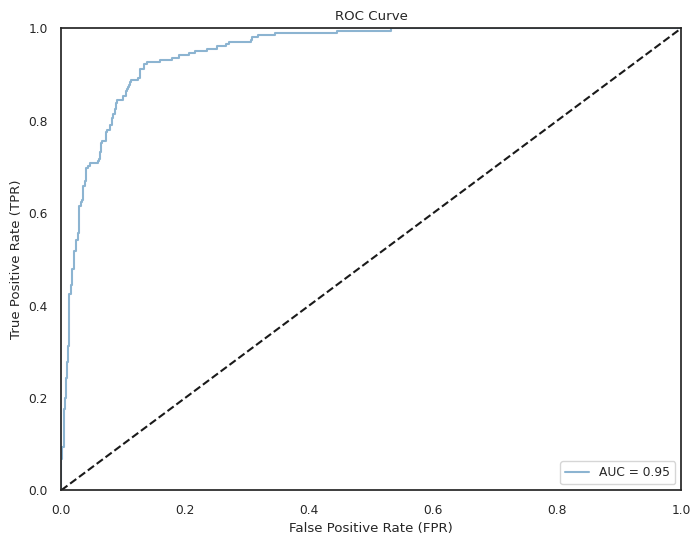

2024-11-24 15:23:13,687 - root - WARNING - /usr/local/lib/python3.10/dist-packages/bluecast/evaluation/eval_metrics.py:48: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


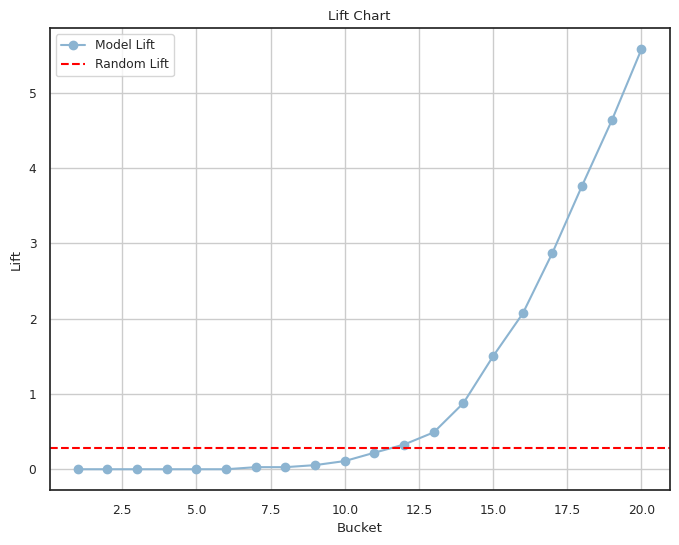

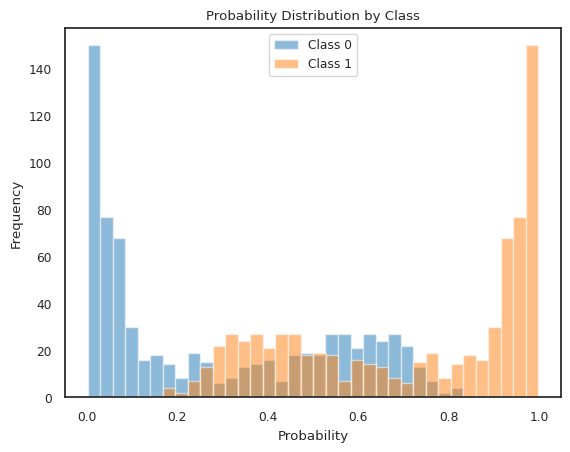

2024-11-24 15:23:14,531 - root - INFO - Start saving out of fold data.


{'matthews': 0.7357479046125549,
 'accuracy': 0.891156462585034,
 'recall': 0.891156462585034,
 'f1_score_macro': 0.8674194595764638,
 'f1_score_micro': 0.891156462585034,
 'f1_score_weighted': 0.8922250093442623,
 'log_loss': 0.3081982742718461,
 'balanced_logloss': 0.3839350938796997,
 'roc_auc': 0.9486608375517718,
 'classfication_report': '              precision    recall  f1-score   support\n\n           0       0.94      0.91      0.92       530\n           1       0.79      0.84      0.81       205\n\n    accuracy                           0.89       735\n   macro avg       0.86      0.88      0.87       735\nweighted avg       0.89      0.89      0.89       735\n',
 'confusion_matrix': array([[483,  47],
        [ 33, 172]])}

In [37]:
automl.fit_eval(
    df=autoML_df,
    df_eval=autoML_df.drop('Healthy_Status', axis=1),
    target_eval=autoML_df['Healthy_Status'],
    target_col="Healthy_Status",
)

2024-11-24 15:24:32,141 - root - INFO - Start casting feature types.
2024-11-24 15:24:32,146 - root - INFO - Dropped the following columns as being Nulls only: [].
2024-11-24 15:24:32,151 - root - INFO - Dropped the following columns as constants only: [].
2024-11-24 15:24:32,153 - root - INFO - Start filling infinite values.
2024-11-24 15:24:32,155 - root - INFO - Start date column conversion.
2024-11-24 15:24:32,161 - root - INFO - Start checking if DataFrame schema of new data is consistent with previous data.
2024-11-24 15:24:32,168 - root - INFO - Start transforming categories with binary target encoder.
2024-11-24 15:24:32,173 - root - INFO - Start transforming categories with binary target encoder.
2024-11-24 15:24:32,208 - root - INFO - Predicting...
2024-11-24 15:24:32,219 - root - INFO - Start predicting on new data using Xgboost model.
2024-11-24 15:24:32,246 - root - INFO - Finished predicting


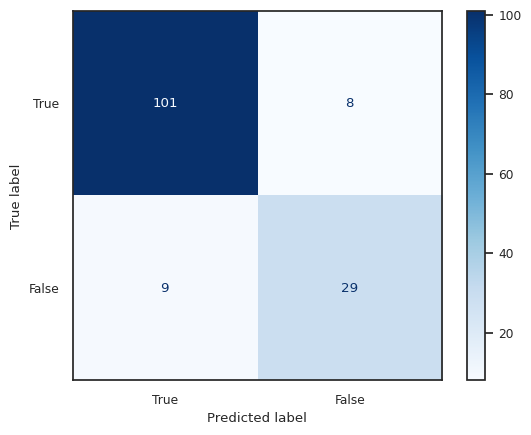

In [40]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
y_probs, y_pred = automl.predict(auto_X_test)

target_names = ['True', 'False']
labels_names = [0,1]
#cm = confusion_matrix(y_test, y_pred,labels=labels_names,normalize='true')
cm = confusion_matrix(auto_Y_test, y_pred,labels=labels_names)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=target_names)
disp = disp.plot(cmap=plt.cm.Blues,values_format='g')
plt.show()

# Hyperparameter Neural Network optimization